In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
%%capture
!pip install av
!pip install transformers
!pip install cv
!pip install scikit-video
!pip install ffmpeg

In [3]:
import pandas as pd
from os import listdir
from os.path import isfile, join
import json
import numpy as np
from tqdm import tqdm
import codecs
import av
from transformers import VivitImageProcessor, VivitModel
# for loading/processing the images
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input

# models
from keras.applications.vgg16 import VGG16
from keras.models import Model

# clustering and dimension reduction
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# for everything else
import os
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import pandas as pd
import pickle
from scipy.spatial.distance import euclidean

In [4]:
df = pd.read_csv('/content/gdrive/MyDrive/Projet_Multimedia/download/CSV/LVD.csv')

In [5]:
video_names = df['name'].apply( lambda x :'video'+ x + '.mp4')

In [6]:
def read_video_pyav(container, indices):
    frames = []
    container.seek(0)
    start_index = indices[0]
    end_index = indices[-1]
    for i, frame in enumerate(container.decode(video=0)):
        if i > end_index:
            break
        if i >= start_index and i in indices:
            frames.append(frame)
    return np.stack([x.to_ndarray(format="rgb24") for x in frames])

In [7]:
matrix_frames = np.load('/content/gdrive/MyDrive/Projet_Multimedia/download/KeyImages/Matrix.npy')

In [16]:
np.max(lenght[:101])

33882.0

In [ ]:
vid_path = '/content/gdrive/MyDrive/Projet_Multimedia/videos/Video_with_label/'
failed = []
dic_name_frames_ind = {}
matrix_frames = np.zeros((len(video_names), 32))
for count, video_name in tqdm(enumerate(video_names)):
  print(video_name)
  try:
    container = av.open(vid_path + video_name)
    n_frames = container.streams.video[0].frames
    if n_frames <1200:
      video = read_video_pyav(container=container, indices = np.arange(0, n_frames, step = 3))
    else:
      video = read_video_pyav(container=container, indices = np.arange(0, n_frames, step = n_frames//400))
    X = (np.sum(video, axis = 3)/(255*3)).reshape(video.shape[0], -1)
    kmeans = KMeans(n_clusters=32, random_state=22, n_init=5)
    kmeans.fit(X)

    closest_pt_idx = np.zeros(32)
    for iclust in range(kmeans.n_clusters):
      # get all points assigned to each cluster:
      cluster_pts = X[kmeans.labels_ == iclust]
      # get all indices of points assigned to this cluster:
      cluster_pts_indices = np.where(kmeans.labels_ == iclust)[0]
      cluster_cen = kmeans.cluster_centers_[iclust]
      min_idx = np.argmin([euclidean(X[idx], cluster_cen) for idx in cluster_pts_indices])
      closest_pt_idx[iclust] = cluster_pts_indices[min_idx]
    matrix_frames[count,:] = closest_pt_idx
    dic_name_frames_ind[video_name] = str(count)
    container.close()
    np.save('/content/gdrive/MyDrive/Projet_Multimedia/download/KeyImages/Matrix.npy', matrix_frames)
  except:
    failed.append(video_name)
dic_name_frames_ind['failed'] = failed
json_object = json.dumps(dic_name_frames_ind, indent = 2)
with codecs.open('/content/gdrive/MyDrive/Projet_Multimedia/download/KeyImages/frames_ind.txt', 'w', encoding='utf-16') as writefile:
  writefile.write(json_object)

0it [00:00, ?it/s]

video-KHQk1_Vq69E.mp4


<ipython-input-28-b6c530e9cfdd>:16: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (32). Possibly due to duplicate points in X.
  kmeans.fit(X)
1it [00:01,  1.28s/it]

video-mG4Y2Snygfk.mp4


2it [00:04,  2.34s/it]

video-OdEfx8up7wM.mp4


3it [00:10,  4.08s/it]

video-Opbfh4wNu7Q.mp4


4it [00:14,  3.96s/it]

video-A5340xbbQJU.mp4


5it [00:21,  4.96s/it]

video-10UKOhzoOws.mp4


6it [00:27,  5.48s/it]

video-0FijgNIo6EM.mp4


7it [00:34,  5.95s/it]

video-bh-dRJaZdgM.mp4


8it [00:42,  6.47s/it]

video-l7bgNoIEOqY.mp4


9it [00:48,  6.36s/it]

video-znxRGH92XDg.mp4


10it [00:57,  7.29s/it]

video-ineZXLbL7s8.mp4


11it [01:03,  6.99s/it]

video-OPdbdjctx2I.mp4


12it [01:11,  7.28s/it]

video-f2i1Ic1xe_o.mp4


13it [01:21,  7.98s/it]

video-6ViUx0xui8Q.mp4


14it [01:25,  6.70s/it]

video-ynUw0YsrmSg.mp4


15it [01:32,  6.98s/it]

video-eA-GJNebJj0.mp4


16it [01:36,  6.07s/it]

video-0N98iKjEucw.mp4


17it [01:44,  6.45s/it]

video-1I8ICdOySkw.mp4


18it [01:50,  6.58s/it]

video-uW9KEiQFUE8.mp4


19it [01:54,  5.81s/it]

video-RVTOIJ4Q1DA.mp4


20it [02:00,  5.76s/it]

video-U11DgbefmQQ.mp4


21it [02:09,  6.81s/it]

video-0b56txegBhw.mp4


22it [02:14,  6.06s/it]

video-pr4CRc_h-9w.mp4


23it [02:22,  6.75s/it]

video-dEOBDIyz0BU.mp4


24it [02:30,  7.23s/it]

video-L_A_HjHZxfI.mp4


25it [02:36,  6.83s/it]

video-FOjYigV2FhA.mp4


26it [02:46,  7.78s/it]

video-xrlgfC0SJ9g.mp4


27it [02:53,  7.36s/it]

video-cWX9iR_PzIQ.mp4


28it [03:02,  8.09s/it]

video-ebyf6FzKEiI.mp4


29it [03:06,  6.84s/it]

video-QI4huHzf3yQ.mp4


30it [03:13,  6.85s/it]

video-YdZMypElBpo.mp4


31it [03:18,  6.10s/it]

video-PZoVPFI2Ll8.mp4


32it [03:24,  6.07s/it]

video-A3JC24p0YsA.mp4


33it [03:26,  4.92s/it]

video-u33o9SJAFlI.mp4


34it [03:35,  6.27s/it]

video-QmJ3xuJrUcM.mp4


35it [03:40,  5.78s/it]

video-_cI8IptHu_c.mp4


36it [03:44,  5.23s/it]

video-1VZdAU2oIrY.mp4


37it [03:53,  6.41s/it]

video-vRnhEjP3R-c.mp4


38it [04:01,  7.01s/it]

video-faYA_upR_a0.mp4


39it [04:07,  6.75s/it]

video-ckEoLBiE3Xs.mp4


40it [04:10,  5.58s/it]

video-cv2JSGnYruU.mp4


41it [04:17,  6.02s/it]

video-WkxE_Fs_mHI.mp4


42it [04:25,  6.54s/it]

video-A9vuHxP734U.mp4


43it [04:27,  5.04s/it]

video-ocAL0oz3HxU.mp4


44it [04:33,  5.33s/it]

video-vJG698U2Mvo.mp4


45it [04:37,  4.93s/it]

video-ml9EdqgtVfU.mp4


46it [04:42,  5.19s/it]

video-DN8vI8cZw1U.mp4


47it [04:48,  5.39s/it]

video-olit-B5Yldc.mp4


48it [04:56,  5.96s/it]

video-9fjEsxhmQi0.mp4


49it [04:58,  4.99s/it]

video-HHsmRoHE7K0.mp4


50it [05:06,  5.89s/it]

video-_1cHSTAv6aw.mp4


51it [05:14,  6.45s/it]

video-IBZmNPJ7gNg.mp4


52it [05:18,  5.63s/it]

video-0Ue-JMqh0CE.mp4


53it [05:19,  4.15s/it]

video-makIgB4X3q8.mp4


54it [05:25,  4.85s/it]

video-tB0HYM9rPvQ.mp4


55it [05:32,  5.42s/it]

video-Wji-BZ0oCwg.mp4


56it [05:40,  6.13s/it]

video-YFB1moyD1UY.mp4


57it [05:45,  5.94s/it]

video-u6euUDxXlAM.mp4


58it [05:52,  6.18s/it]

video-w28U-Js6g1Q.mp4


59it [06:00,  6.85s/it]

video-3nYvJY2C9B4.mp4


60it [06:05,  6.15s/it]

video-agqgBkpbCoY.mp4


61it [06:13,  6.86s/it]

video-8B8rjjbVApE.mp4


62it [06:16,  5.54s/it]

video-oKficmlxzaI.mp4


63it [06:23,  6.18s/it]

video-oOOCx287v4Q.mp4


64it [06:26,  5.10s/it]

video-ayEm-AnLJV4.mp4


65it [06:36,  6.68s/it]

video-AwRAfxBub9M.mp4


66it [06:37,  4.98s/it]

video-gbVip_XLjg0.mp4


67it [06:44,  5.62s/it]

video-0hhbMi5xFtc.mp4


68it [06:52,  6.19s/it]

video-8rAxqWMKErQ.mp4


69it [06:58,  6.24s/it]

video-EHwSKLaPIwU.mp4


70it [07:03,  5.70s/it]

video-FEEPFA-Tn0o.mp4


71it [07:11,  6.55s/it]

video-2RqWYIB1O-0.mp4


72it [07:12,  4.95s/it]

video-cOvModiiUjs.mp4


73it [07:19,  5.47s/it]

video-hY6SC2W5nMc.mp4


74it [07:26,  5.97s/it]

video-J3iVxb8cwOU.mp4


75it [07:33,  6.30s/it]

video-ysm7LT3ojDQ.mp4


76it [07:42,  7.04s/it]

video-5z7fKiO5Uzg.mp4


77it [07:51,  7.51s/it]

video-3dmqlTgmVOo.mp4


78it [07:56,  6.69s/it]

video-cUusX1Js6R0.mp4


79it [08:01,  6.44s/it]

video-WNHJnUIGQ_U.mp4


80it [08:07,  6.26s/it]

video-tEyDRWmQEKs.mp4


81it [08:15,  6.78s/it]

video-r-wc7bB2G94.mp4


82it [08:22,  6.70s/it]

video-E07s5ZYygMg.mp4


83it [08:31,  7.32s/it]

video-KTtkpl7T9sg.mp4


84it [08:37,  7.21s/it]

video-ez6mZxgL1Wg.mp4


85it [08:41,  5.97s/it]

video-hhaNVna7eQs.mp4


86it [08:47,  6.07s/it]

video-_TbWcdN-W8o.mp4


87it [08:52,  5.82s/it]

video-1Ez6dw3ywcc.mp4


88it [08:59,  6.23s/it]

video-6n5IGnuadhM.mp4


89it [09:05,  6.11s/it]

video-hE3jShGPscQ.mp4


90it [09:11,  6.09s/it]

video-ZqD0iHDKmzg.mp4


91it [09:20,  6.86s/it]

video-dVU1CgSJ-_A.mp4


92it [09:27,  6.99s/it]

video-3SIfsFz_kMQ.mp4


93it [09:37,  7.84s/it]

video-mMZ6QRf2Uig.mp4


94it [09:43,  7.41s/it]

video-3yd_1z6OsrE.mp4


95it [09:52,  7.89s/it]

video-6nX0lYo0Uno.mp4


96it [09:56,  6.56s/it]

video-eR6FnIJXsH8.mp4


97it [09:59,  5.59s/it]

video-MakDheao8ys.mp4


98it [10:07,  6.42s/it]

video-tUyeaT2ZX1I.mp4


99it [10:13,  6.28s/it]

video-4GfBVEoxStA.mp4


100it [10:20,  6.26s/it]

video-KYazqIHYqNI.mp4


101it [10:29,  7.08s/it]

video-_Lb72uR2P_U.mp4


102it [10:33,  6.37s/it]

video-QeYISW-Jplw.mp4


103it [10:46,  8.30s/it]

video-tByqpujET9o.mp4


104it [10:56,  8.66s/it]

video-mpDOscUDQ_0.mp4


105it [11:02,  7.87s/it]

video-RxtzQg57O7w.mp4


106it [11:11,  8.39s/it]

video-oY6tCnu-1Do.mp4


107it [11:15,  6.86s/it]

video-Fq_9AkL44_0.mp4


108it [11:21,  6.63s/it]

video-9GorqroigqM.mp4


109it [11:30,  7.35s/it]

video-K7vFmyZmvO0.mp4


110it [11:36,  6.96s/it]

video-s1FWVQFeOpQ.mp4


111it [11:43,  7.02s/it]

video-RRWFnA2CxLM.mp4


112it [11:48,  6.38s/it]

video-uwFhl9lG-z0.mp4


113it [11:58,  7.59s/it]

video-7WhJ2L5xUqI.mp4


114it [12:03,  6.64s/it]

video-GZjt_sA2eso.mp4


115it [12:10,  6.81s/it]

video-3ArSvRALhHk.mp4


116it [12:19,  7.66s/it]

video-EIYDPwY3gNk.mp4


117it [12:22,  6.22s/it]

video-sJzSUK6-O2Q.mp4


118it [12:30,  6.61s/it]

video-m0y1uv-CRWk.mp4


119it [12:32,  5.19s/it]

video-JhYZy1ugI3Q.mp4


120it [12:41,  6.27s/it]

video-cwR4kAg6KFw.mp4


121it [12:49,  7.05s/it]

video-81kd2SbB0qM.mp4


122it [12:52,  5.67s/it]

video-lwS74rI92YQ.mp4


123it [12:53,  4.36s/it]

video-1WpStml5fe8.mp4


124it [13:00,  5.20s/it]

video-h6oooSMEeQw.mp4


125it [13:05,  4.97s/it]

video-WdKbSQWyqDM.mp4


126it [13:07,  4.27s/it]

video-Bk4MR0IItiQ.mp4


127it [13:14,  4.98s/it]

video-tuv3R5uYm8s.mp4


128it [13:22,  6.01s/it]

video-K_P8kQg1Qq8.mp4


129it [13:30,  6.46s/it]

video-wEp4ItQzzCU.mp4


130it [13:36,  6.32s/it]

video-QLRTrxSMvgw.mp4


131it [13:45,  7.02s/it]

video-vqDbMEdLiCs.mp4


132it [13:54,  7.85s/it]

video-pcqf18nqFkw.mp4


133it [14:03,  7.95s/it]

video-1VM2eLhvsSM.mp4


134it [14:06,  6.72s/it]

video-Alc7AhymB9o.mp4


135it [14:10,  5.90s/it]

video-GSvbZyWXsME.mp4


136it [14:16,  5.69s/it]

video-rNSnfXl1ZjU.mp4


137it [14:22,  6.04s/it]

video-F5jNkpjGh8A.mp4


138it [14:32,  7.08s/it]

video-8EAwxmi04d0.mp4


139it [14:40,  7.24s/it]

video-oZAeKfGpd2M.mp4


140it [14:49,  7.96s/it]

video-UYzKuX0oE6E.mp4


141it [14:55,  7.37s/it]

video-OITWgx8K6Ko.mp4


142it [14:58,  6.03s/it]

video-J7RG7yLBx64.mp4


143it [15:01,  5.00s/it]

video-5xKVGL35pFc.mp4


144it [15:07,  5.29s/it]

video-aE0yle-z5uE.mp4


145it [15:14,  6.04s/it]

video-2_Z1KdMtDD4.mp4


146it [15:17,  5.02s/it]

video-pQD6gJMnWVs.mp4


147it [15:21,  4.83s/it]

video-rbNB0jqMv7s.mp4


148it [15:25,  4.50s/it]

video-w0ffwDYo00Q.mp4


149it [15:28,  4.07s/it]

video-kW1e1qTG_p4.mp4


150it [15:37,  5.38s/it]

video-7CSlsvxgfhE.mp4


151it [15:43,  5.69s/it]

video-3EFiduilmn8.mp4


152it [15:45,  4.67s/it]

video-4XwDbm_37cw.mp4


153it [15:54,  5.83s/it]

video-AmC9SmCBUj4.mp4


154it [15:59,  5.64s/it]

video-CrqIVVd3hp0.mp4


155it [16:08,  6.49s/it]

video-v_dbomeVN2c.mp4


156it [16:09,  5.09s/it]

video-bDird_PgnVs.mp4


157it [16:12,  4.37s/it]

video-6q-d8uEI7N8.mp4


158it [16:23,  6.39s/it]

video-n6OHkuC9vsE.mp4


159it [16:28,  5.81s/it]

video-_10tsL37VS4.mp4


160it [16:33,  5.57s/it]

video-CtP83CWOMwc.mp4


161it [16:41,  6.39s/it]

video-nGm_DqYtm_Q.mp4


162it [16:42,  4.73s/it]

video-1MwVkb8PROo.mp4


163it [16:49,  5.53s/it]

video-2uWgga3IeKE.mp4


164it [16:55,  5.68s/it]

video-IDIQKPApIxM.mp4


165it [16:58,  4.85s/it]

video-1Jnpn__I5Hs.mp4


166it [17:04,  5.27s/it]

video-36OitAr_YQY.mp4


167it [17:08,  4.70s/it]

video-dTqW89AjVA0.mp4


168it [17:13,  4.85s/it]

video-1UdI_eoDPKQ.mp4


169it [17:16,  4.21s/it]

video-Ij9EnG6cF40.mp4


170it [17:23,  5.05s/it]

video-mQrij7m7uow.mp4


171it [17:32,  6.21s/it]

video-trTN4AoyC8U.mp4


172it [17:37,  5.99s/it]

video-g26mbST0YhU.mp4


173it [17:43,  5.97s/it]

video-osVxO-RA-pE.mp4


174it [17:45,  4.87s/it]

video--jeILZA-hDE.mp4


175it [17:54,  5.93s/it]

video-VIglbPLTzVs.mp4


176it [17:57,  5.03s/it]

video-dkjbMoj0JY4.mp4


177it [17:59,  4.10s/it]

video-VqrBsMFRaLA.mp4


178it [18:07,  5.30s/it]

video-NQQH5TfyNKc.mp4


179it [18:09,  4.41s/it]

video-VMbC4Fww1P4.mp4


180it [18:15,  4.98s/it]

video-wJ-mdxp_TY0.mp4


181it [18:20,  4.79s/it]

video-R4vDqlKMbrk.mp4


182it [18:27,  5.52s/it]

video-tNeYTDLZUJA.mp4


183it [18:36,  6.68s/it]

video-3heXk6Oj6hU.mp4


184it [18:40,  5.73s/it]

video-T8NJLxTIEO0.mp4


185it [18:46,  6.01s/it]

video-GRi80V8ire8.mp4


186it [18:52,  5.93s/it]

video-iqKdEhx-dD4.mp4


187it [19:01,  6.81s/it]

video-k431Cy2-kkA.mp4


188it [19:10,  7.32s/it]

video-c8xAFBeJJUA.mp4


189it [19:17,  7.32s/it]

video-mWX9ZbrNoBo.mp4


190it [19:25,  7.45s/it]

video-AfW1MDjZB30.mp4


191it [19:27,  5.98s/it]

video-4KGSi0AoJYs.mp4


192it [19:37,  7.08s/it]

video-vcrOYQbg3hY.mp4


193it [19:45,  7.24s/it]

video-hc1hzSvynVY.mp4


194it [19:45,  5.15s/it]

video-XrgVtuDRBjM.mp4


195it [19:55,  6.60s/it]

video--cf_-i_gCdY.mp4


196it [20:01,  6.35s/it]

video-_TEtfrHg1zw.mp4


197it [20:10,  7.29s/it]

video-UjxMEeGnmyU.mp4


198it [20:12,  5.55s/it]

video-hWKHbL6km7M.mp4


199it [20:18,  5.82s/it]

video-0JboM-STb4E.mp4


In [ ]:
matrix_frames = np.load('/content/gdrive/MyDrive/Projet_Multimedia/download/KeyImages/Matrix.npy')


False

In [ ]:
matrix_frames = np.load('/content/gdrive/MyDrive/Projet_Multimedia/download/KeyImages/Matrix.npy')

In [ ]:
for i in range(100):
  if sum(matrix_frames[5,:]) == 0:
    print(i)

In [ ]:
np.sum(matrix_frames[0,:]) == 0

True

In [ ]:
if sum(matrix_frames[0,:]) ==0:
    print(count)

109


In [ ]:
for count, video_name in tqdm(enumerate(video_names[:110])):
  if sum(matrix_frames[count,:]) ==0:
    print(count, video_name)

110it [00:00, 62037.57it/s]

0 video-KHQk1_Vq69E.mp4
102 video-QeYISW-Jplw.mp4
103 video-tByqpujET9o.mp4
104 video-mpDOscUDQ_0.mp4
105 video-RxtzQg57O7w.mp4
106 video-oY6tCnu-1Do.mp4
107 video-Fq_9AkL44_0.mp4
108 video-9GorqroigqM.mp4
109 video-K7vFmyZmvO0.mp4


In [ ]:
vid_path = '/content/gdrive/MyDrive/Projet_Multimedia/videos/Video_with_label/'
matrix_frames = np.load('/content/gdrive/MyDrive/Projet_Multimedia/download/KeyImages/Matrix.npy')
for count, video_name in tqdm(enumerate(video_names)):
  if sum(matrix_frames[count,:]) ==0:
    try:
      print(count)
      container = av.open(vid_path + video_name)
      video = read_video_pyav(container=container, indices = np.arange(0, container.streams.video[0].frames, step = min(3, container.streams.video[0].frames//32)))
      container.close()
      X = (np.sum(video, axis = 3)/(255*3)).reshape(video.shape[0], -1)
      kmeans = KMeans(n_clusters=32, random_state=22, n_init=5)
      kmeans.fit(X)

      closest_pt_idx = np.zeros(32)
      for iclust in range(kmeans.n_clusters):
        # get all points assigned to each cluster:
        cluster_pts = X[kmeans.labels_ == iclust]
        # get all indices of points assigned to this cluster:
        cluster_pts_indices = np.where(kmeans.labels_ == iclust)[0]
        cluster_cen = kmeans.cluster_centers_[iclust]
        min_idx = np.argmin([euclidean(X[idx], cluster_cen) for idx in cluster_pts_indices])
        closest_pt_idx[iclust] = cluster_pts_indices[min_idx]
      matrix_frames[count,:] = closest_pt_idx
      np.save('/content/gdrive/MyDrive/Projet_Multimedia/download/KeyImages/Matrix.npy', matrix_frames)
    except:
      a = True

0it [00:00, ?it/s]

0


<ipython-input-29-62e94926703e>:12: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (32). Possibly due to duplicate points in X.
  kmeans.fit(X)
1it [00:02,  2.41s/it]

102


In [ ]:
dic_name_frames_ind

{'video-OdEfx8up7wM.mp4': '0',
 'video-Opbfh4wNu7Q.mp4': '1',
 'video-A5340xbbQJU.mp4': '2',
 'video-10UKOhzoOws.mp4': '3',
 'video-0FijgNIo6EM.mp4': '4',
 'video-bh-dRJaZdgM.mp4': '5',
 'video-l7bgNoIEOqY.mp4': '6',
 'video-znxRGH92XDg.mp4': '7',
 'failed': []}

In [ ]:
kmeans.n_clusters

32

In [ ]:
test = np.sum(video, axis = 3)/(255*3)
test = test.reshape(test.shape[0], -1)
test.shape

(632, 25344)

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=22, n_init=5)
kmeans.fit(test)

KMeans(n_clusters=4, n_init=5, random_state=22)

In [ ]:


# Loop over all clusters and find index of closest point to the cluster center and append to closest_pt_idx list.
closest_pt_idx = []
for iclust in range(kmeans.n_clusters):
    # get all points assigned to each cluster:
    cluster_pts = test[kmeans.labels_ == iclust]
    # get all indices of points assigned to this cluster:
    cluster_pts_indices = np.where(kmeans.labels_ == iclust)[0]

    cluster_cen = kmeans.cluster_centers_[iclust]
    min_idx = np.argmin([euclidean(test[idx], cluster_cen) for idx in cluster_pts_indices])

    # Testing:
    print('closest point to cluster center: ', cluster_pts[min_idx])
    print('closest index of point to cluster center: ', cluster_pts_indices[min_idx])
    print('  ', test[cluster_pts_indices[min_idx]])
    closest_pt_idx.append(cluster_pts_indices[min_idx])

closest point to cluster center:  [0. 0. 0. ... 0. 0. 0.]
closest index of point to cluster center:  577
   [0. 0. 0. ... 0. 0. 0.]
closest point to cluster center:  [0. 0. 0. ... 0. 0. 0.]
closest index of point to cluster center:  19
   [0. 0. 0. ... 0. 0. 0.]
closest point to cluster center:  [0. 0. 0. ... 0. 0. 0.]
closest index of point to cluster center:  426
   [0. 0. 0. ... 0. 0. 0.]
closest point to cluster center:  [0.00392157 0.00392157 0.00392157 ... 0.         0.         0.        ]
closest index of point to cluster center:  523
   [0.00392157 0.00392157 0.00392157 ... 0.         0.         0.        ]


In [ ]:
closest_pt_idx

[577, 19, 426, 523]

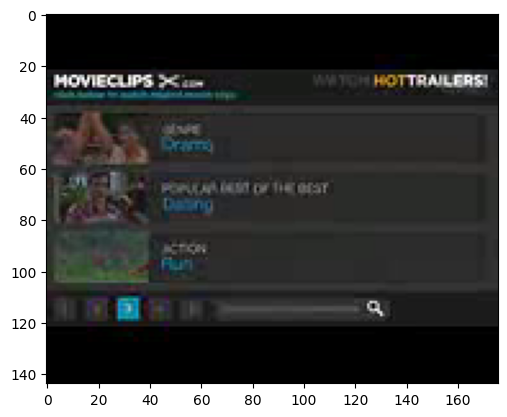

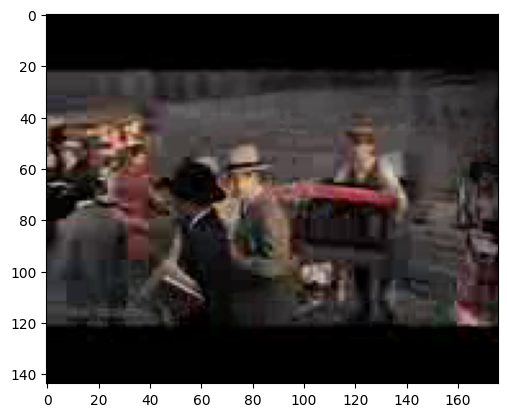

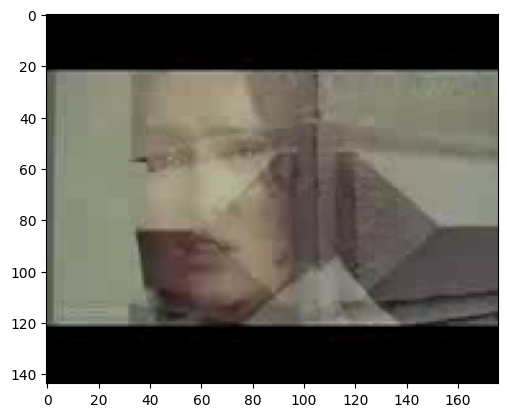

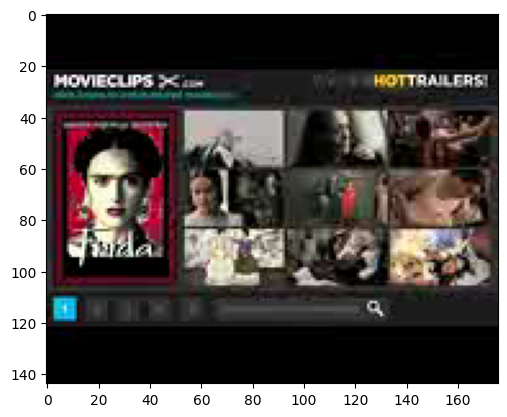

In [ ]:
for ind in closest_pt_idx:
  plt.imshow(video[ind])
  plt.show()